In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 200
pfilled = .3
centphase = np.pi/4

phaseAngles = np.linspace(centphase-pfilled*2*np.pi/2, centphase+pfilled*2*np.pi/2, N)

cdd = np.exp(1j* phaseAngles)
cdi = np.imag(cdd)
cdis = np.sign(cdi)
cdism = np.mean(cdis)
pli = abs(cdism)

ispc = abs(np.mean(cdd))

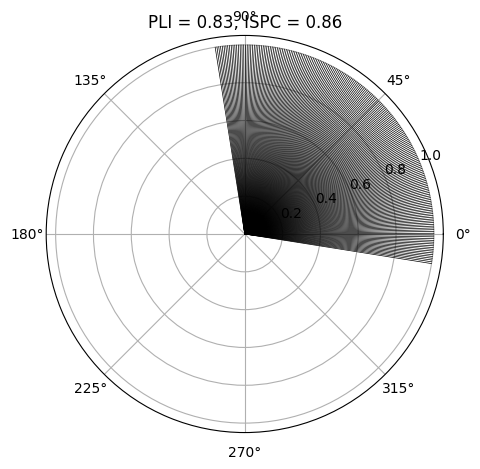

In [3]:
plt.polar([np.zeros(N), phaseAngles], [np.zeros(N), np.ones(N)], "k", linewidth=.5)
plt.title(f"PLI = {round(pli,2)}, ISPC = {round(ispc,2)}")
plt.tight_layout()

In [4]:
pfilledrange = np.linspace(0, 1, 40)
centphaserange = np.linspace(0, 2*np.pi, 30)

pli = np.zeros((len(pfilledrange), len(centphaserange)))
ispc = np.zeros((len(pfilledrange), len(centphaserange)))

for pfilli in range(len(pfilledrange)):
    for centi in range(len(centphaserange)):
        pfilled = pfilledrange[pfilli]
        centphase = centphaserange[centi]

        phaseAngles = np.linspace(centphase-pfilled*2*np.pi/2, centphase+pfilled*2*np.pi/2, N)

        cdd = np.exp(1j* phaseAngles)

        pli[pfilli, centi] = abs(np.mean((np.sign((np.imag(cdd))))))
        ispc[pfilli, centi] = abs(np.mean((cdd)))

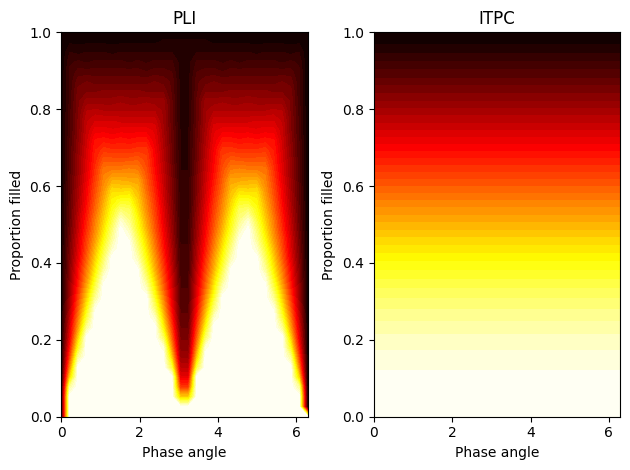

In [5]:
plt.subplot(121)
plt.contourf(centphaserange, pfilledrange, pli, cmap="hot", levels=40)
plt.ylabel("Proportion filled")
plt.xlabel("Phase angle")
plt.title("PLI")

plt.subplot(122)
plt.contourf(centphaserange, pfilledrange, ispc, cmap="hot", levels=40)
plt.ylabel("Proportion filled")
plt.xlabel("Phase angle")
plt.title("ITPC")

plt.tight_layout()